**用abalone数据**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score
import sklearn.datasets as datasets
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import sklearn.datasets as datasets
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell ##显示单元格内全部命令结果
InteractiveShell.ast_node_interactivity="all"

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
col_names=['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
abalone= pd.read_csv(url, names=col_names) 

In [3]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.shape

(4177, 9)

In [5]:
abalone.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [7]:
abalone.describe().T   ###rings就是年龄 (转置一下更好看)

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


## 看所有变量分布

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'whole_weight'}>,
        <AxesSubplot:title={'center':'shucked_weight'}>,
        <AxesSubplot:title={'center':'viscera_weight'}>],
       [<AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'rings'}>, <AxesSubplot:>]],
      dtype=object)

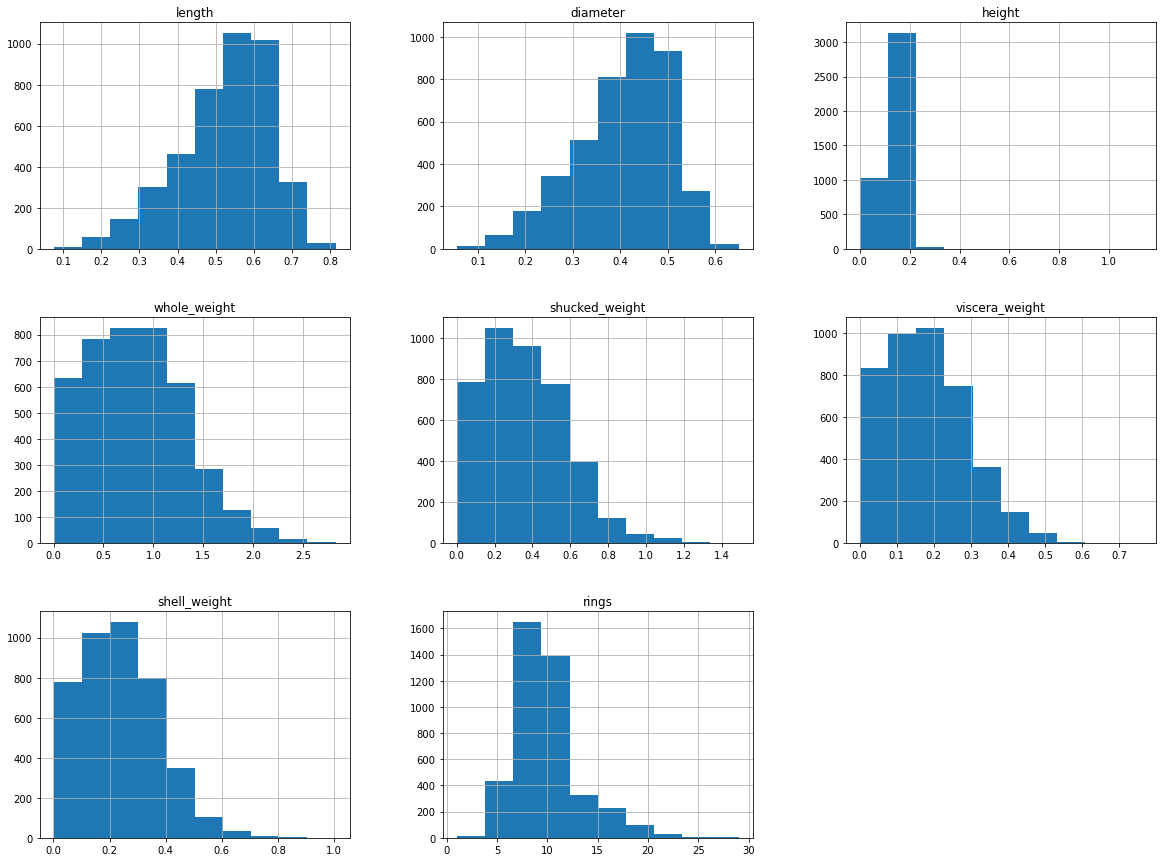

In [8]:
abalone.hist(figsize=(20,15))

## 看corrlation矩阵

In [9]:
m=abalone.corr()
m

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Figure size 1440x1080 with 0 Axes>

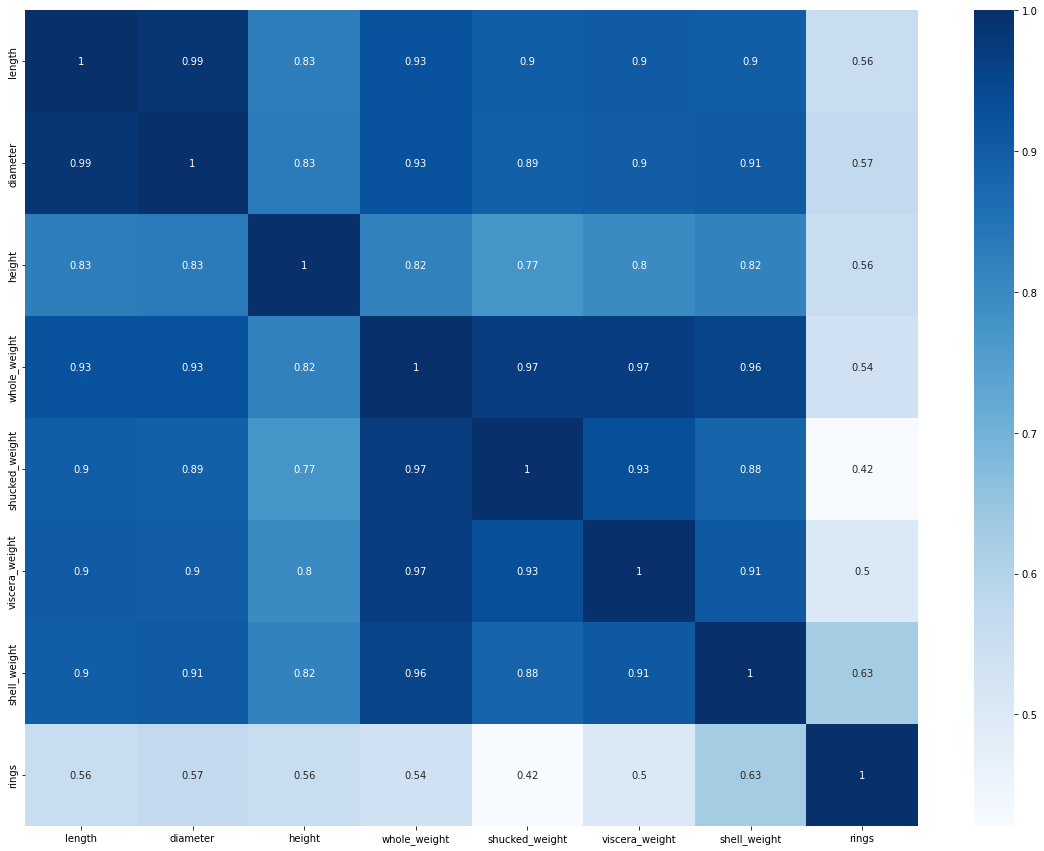

In [10]:
plt.figure(figsize = (20,15)) ##控制图大小
heatmap=sns.heatmap(m,cmap='Blues',annot=True)  ##annot是否写数字

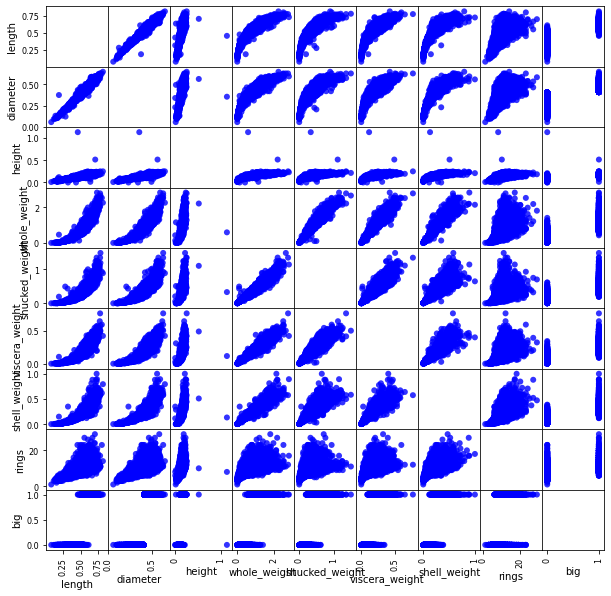

In [16]:
fig = pd.plotting.scatter_matrix(abalone,figsize=(10,10),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2) 
# diagonal只能为'hist'/'kde'
plt.show()

## 找和y的相关性

### **找和rings最相关的5个变量**

In [11]:
m.nlargest(5, 'rings').index  

Index(['rings', 'shell_weight', 'diameter', 'height', 'length'], dtype='object')

### 对y画图

<Figure size 36x36 with 0 Axes>

<Figure size 36x36 with 0 Axes>

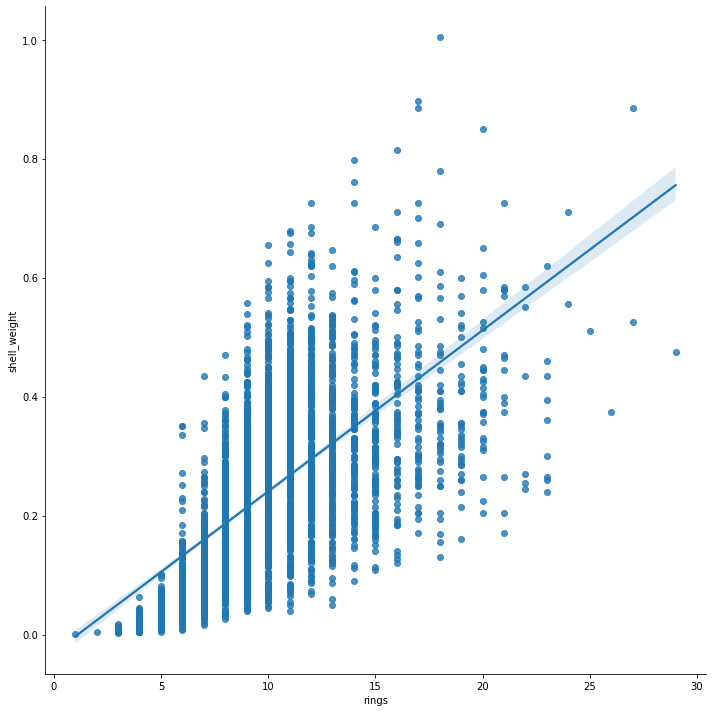

In [12]:
plt.figure(figsize=(0.5, 0.5))
sns.lmplot(x='rings',y='shell_weight',data=abalone[['rings','shell_weight']],height=10, aspect=1)


### 分组画图

In [13]:
##先生成dummy
abalone['big']=abalone['diameter'].map(lambda a:1 if a>np.mean(abalone.diameter) else 0)


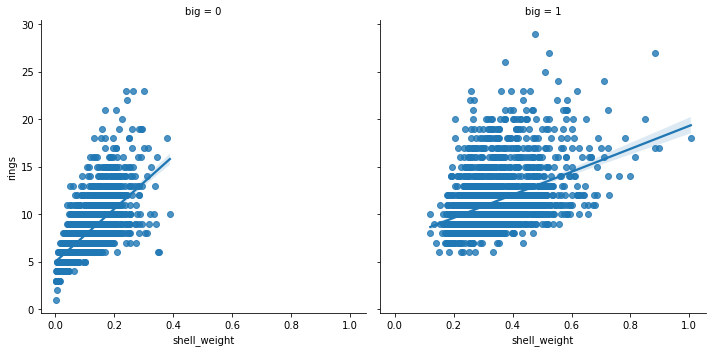

In [14]:
sns.lmplot(x="shell_weight", y="rings", col="big", col_wrap=2,data=abalone)
